# **Fully Connnected Layer (Dense Layer)**

Fully Connected Layer (FC layer) atau Dense Layer adalah lapisan pada jaringan saraf tiruan (Artificial Neural Network) di mana setiap neuron terhubung dengan seluruh neuron pada lapisan sebelumnya.

Lapisan ini berfungsi untuk:

1. Menggabungkan seluruh fitur yang telah diekstraksi

2. Melakukan proses pengambilan keputusan

3. Menghasilkan output akhir berupa kelas, probabilitas, atau nilai prediksi

Dalam arsitektur CNN, fully connected layer biasanya berada di bagian akhir jaringan setelah feature extraction (Konvolusi-Aktivasi-Pooling) selesai.

Pada fully connected layer:

- Setiap input memiliki bobot (weight)

- Setiap neuron memiliki bias

- Output dihitung melalui kombinasi linear lalu dilewatkan ke fungsi aktivasi

# **Model Matematis Fully Connected Layer**

Misalkan:

Input vektor:
$$
\mathbf{x} = [x_1, x_2, \dots, x_n]^T
$$

Bobot:
$$
\mathbf{w} = [w_1, w_2, \dots, w_n]^T
$$

Bias:
$$
b
$$

Operasi linear pada fully connected layer:
$$
z = \mathbf{w}^T \mathbf{x} + b
$$


# **Import Library**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

Penjelasan:

- torch : library utama PyTorch

- torch.nn : berisi layer neural network, termasuk Linear (fully connected)

- torch.optim : optimizer (Adam, SGD, dll)

- datasets : dataset siap pakai (MNIST)

- transforms : preprocessing data

- DataLoader : batching data

- matplotlib : visualisasi

- numpy : operasi numerik

# **Transformasi Data**

In [ ]:
# Transformasi data: ubah gambar ke tensor
transform = transforms.Compose([transforms.ToTensor()])

Penjelasan:

- ToTensor(): mengubah skala gambar nilai piksel dari [0,255] → [0,1]

# **Load Dataset MNIST**

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.80MB/s]


Penjelasan:

- MNIST berisi angka 0–9

- train=True : data latih

- train=False : data uji

- transform=transform : preprocessing diterapkan

# **DataLoader (Batching)**

In [ ]:
# DataLoader untuk batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Penjelasan:

- Data tidak diproses satu per satu, tapi per batch

- batch_size=64 : artinya 64 gambar diproses sekaligus

- shuffle=True untuk training : mencegah bias urutan data

# **Visualisasi Sampel Data**

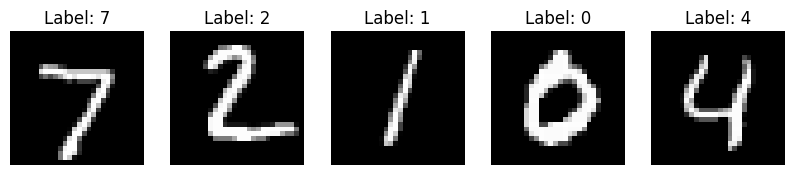

In [ ]:
# menampilkan beberapa gambar dari dataset
def show_sample_images(dataset, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    for i in range(num):
        img, label = dataset[i]
        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

show_sample_images(test_dataset)

# **Model Fully Connected**

In [ ]:
# Model Fully Connected: Perbandingan dengan Bias vs Tanpa Bias
class SimpleNN(nn.Module):
    def __init__(self, use_bias: bool = True):
        super(SimpleNN, self).__init__()
        # use_bias=True  -> y = Wx + b
        # use_bias=False -> y = Wx (tanpa offset/intercept)
        self.fc1 = nn.Linear(28 * 28, 128, bias=use_bias)  # 784 -> 128
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64, bias=use_bias)
        self.fc3 = nn.Linear(64, 10, bias=use_bias)       # 10 kelas

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten: (batch, 1, 28, 28) -> (batch, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# ------------------------------------------------------------
# 1) Buat dua model: dengan bias vs tanpa bias
# ------------------------------------------------------------
torch.manual_seed(42)  # seed untuk konsistensi

model_bias = SimpleNN(use_bias=True)
model_nobias = SimpleNN(use_bias=False)

# ------------------------------------------------------------
# 2) Supaya perbandingan lebih adil:
#    samakan bobot awal (WEIGHT) model_nobias dengan model_bias
#    (bias tidak bisa disalin karena memang tidak ada pada model_nobias)
# ------------------------------------------------------------
with torch.no_grad():
    model_nobias.fc1.weight.copy_(model_bias.fc1.weight)
    model_nobias.fc2.weight.copy_(model_bias.fc2.weight)
    model_nobias.fc3.weight.copy_(model_bias.fc3.weight)

# ------------------------------------------------------------
# 3) Cek apakah bias ada / tidak
# ------------------------------------------------------------
print("Bias fc1 (model_bias) :", model_bias.fc1.bias.shape)
print("Bias fc1 (model_nobias):", model_nobias.fc1.bias)  # None jika bias=False

# ------------------------------------------------------------
# 4) Bandingkan jumlah parameter
# ------------------------------------------------------------
def hitung_parameter(model):
    return sum(p.numel() for p in model.parameters())

print("Jumlah parameter (dengan bias) :", hitung_parameter(model_bias))
print("Jumlah parameter (tanpa bias)  :", hitung_parameter(model_nobias))


Bias fc1 (model_bias) : torch.Size([128])
Bias fc1 (model_nobias): None
Jumlah parameter (dengan bias) : 109386
Jumlah parameter (tanpa bias)  : 109184


Penjelasan:

Pada bagian ini, kita membuat **dua model MLP (Fully Connected)** yang arsitekturnya sama, tetapi berbeda pada penggunaan **bias**.

- **Dengan bias (use_bias=True)**: setiap layer Linear belajar fungsi
  \(y = Wx + b\).
  Artinya neuron punya *offset/intercept* \(b\) untuk menggeser output.

- **Tanpa bias (use_bias=False)**: setiap layer Linear belajar fungsi
  \(y = Wx\).
  Jika input \(x=0\), maka output pasti \(y=0\). Model jadi lebih “terbatas” karena tidak bisa menggeser output.

Agar perbandingan lebih adil, kita **menyamakan bobot awal (weight)** model tanpa bias dengan model yang memakai bias. Dengan begitu, perbedaan yang terlihat pada grafik nanti lebih terkait dengan **ada/tidaknya bias**, bukan karena inisialisasi bobot yang berbeda.

Terakhir, kita cek:
- Bias pada `model_bias` ada (berbentuk vektor).
- Bias pada `model_nobias` adalah `None`.
- Jumlah parameter model dengan bias **lebih banyak** karena ada tambahan parameter bias di setiap layer Linear.


**B. Bagian forward**

- x.view(x.size(0), -1):
> - x.size(0) → ukuran batch (jumlah gambar).
> - -1 → otomatis hitung sisa dimensi (784).
> - Tujuan: Flatten gambar dari [batch, 1, 28, 28] menjadi [batch, 784].

- Alur forward:
> - Masuk ke fc1, aktifasi ReLU, masuk ke fc2, aktifasi ReLU, lalu ke fc3.

# **Inisialisasi Loss Function, dan Optimizer**

In [ ]:
# Loss function (sama untuk kedua model)
criterion = nn.CrossEntropyLoss()

# Fungsi pembuat optimizer (hyperparameter sama untuk model bias & non-bias)
def buat_optimizer(model, lr=0.001):
    return optim.Adam(model.parameters(), lr=lr)


Penjelasan:

- `nn.CrossEntropyLoss()` digunakan untuk tugas **klasifikasi multikelas** (MNIST 10 kelas).
- Kita membuat fungsi `buat_optimizer(...)` agar:
  - Model **dengan bias** dan **tanpa bias** memakai optimizer yang sama (Adam)
  - Learning rate yang sama, sehingga perbandingan lebih fair.


# **Training Loop**

In [ ]:
# Training Loop (dibuat menjadi fungsi agar bisa dipakai untuk 2 model)

def evaluate_model(model, loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

def train_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    optimizer = buat_optimizer(model, lr=lr)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Evaluasi setiap epoch
        train_acc = evaluate_model(model, train_loader)
        test_acc = evaluate_model(model, test_loader)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f'Epoch [{epoch+1}/{epochs}] | Loss: {avg_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%')

    return train_losses, train_accuracies, test_accuracies

# -----------------------------
# Jalankan eksperimen 2 model
# -----------------------------
EPOCHS = 5

print("=== Training: MODEL DENGAN BIAS ===")
loss_bias, acc_bias, testacc_bias = train_model(model_bias, train_loader, test_loader, epochs=EPOCHS, lr=0.001)

print("\n=== Training: MODEL TANPA BIAS ===")
loss_nobias, acc_nobias, testacc_nobias = train_model(model_nobias, train_loader, test_loader, epochs=EPOCHS, lr=0.001)

print("\nRingkasan Akhir:")
print(f"Final Test Accuracy (dengan bias) : {testacc_bias[-1]:.2f}%")
print(f"Final Test Accuracy (tanpa bias)  : {testacc_nobias[-1]:.2f}%")


=== Training: MODEL DENGAN BIAS ===
Epoch [1/5] | Loss: 0.3372 | Train Acc: 95.34% | Test Acc: 95.24%
Epoch [2/5] | Loss: 0.1379 | Train Acc: 97.17% | Test Acc: 96.77%
Epoch [3/5] | Loss: 0.0949 | Train Acc: 97.89% | Test Acc: 97.09%
Epoch [4/5] | Loss: 0.0704 | Train Acc: 98.21% | Test Acc: 97.27%
Epoch [5/5] | Loss: 0.0560 | Train Acc: 98.72% | Test Acc: 97.56%

=== Training: MODEL TANPA BIAS ===
Epoch [1/5] | Loss: 0.3393 | Train Acc: 94.86% | Test Acc: 94.68%
Epoch [2/5] | Loss: 0.1422 | Train Acc: 96.77% | Test Acc: 96.17%
Epoch [3/5] | Loss: 0.0970 | Train Acc: 97.91% | Test Acc: 97.04%
Epoch [4/5] | Loss: 0.0719 | Train Acc: 98.23% | Test Acc: 97.26%
Epoch [5/5] | Loss: 0.0569 | Train Acc: 98.69% | Test Acc: 97.13%

Ringkasan Akhir:
Final Test Accuracy (dengan bias) : 97.56%
Final Test Accuracy (tanpa bias)  : 97.13%


Penjelasan:

Kita membuat training loop menjadi **fungsi** agar bisa dipakai untuk dua model:

1) `evaluate_model(model, loader)`  
   - Menghitung akurasi dengan cara membandingkan prediksi dengan label asli.
   - Menggunakan `torch.no_grad()` karena evaluasi tidak butuh gradient.

2) `train_model(model, ...)`  
   - Melakukan proses training selama beberapa epoch:
     - Forward → hitung loss → backward → update parameter
   - Mencatat:
     - `train_losses` (rata-rata loss per epoch)
     - `train_accuracies` (akurasi pada train set per epoch)
     - `test_accuracies` (akurasi pada test set per epoch)

Terakhir, kita menjalankan training untuk:
- **MODEL DENGAN BIAS**
- **MODEL TANPA BIAS**

Dengan setup ini, perbandingan yang kita lihat pada grafik nanti langsung menunjukkan dampak **bias vs non-bias**.


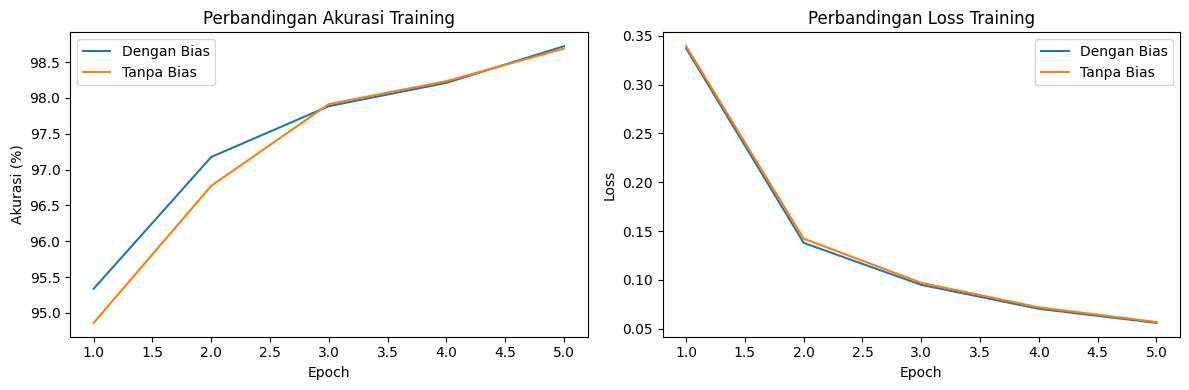

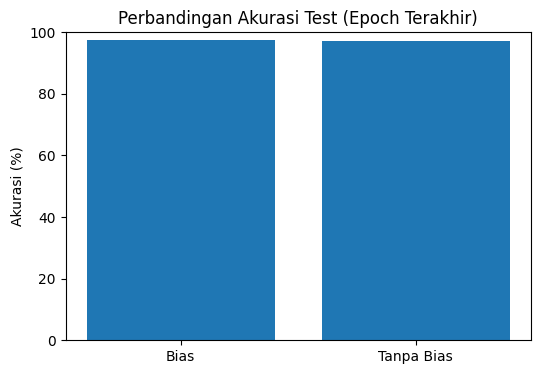

In [ ]:
# Grafik perbandingan: Bias vs Tanpa Bias

epochs_range = range(1, EPOCHS + 1)

# 1) Plot akurasi training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_bias, label='Dengan Bias')
plt.plot(epochs_range, acc_nobias, label='Tanpa Bias')
plt.title('Perbandingan Akurasi Training')
plt.xlabel('Epoch')
plt.ylabel('Akurasi (%)')
plt.legend()

# 2) Plot loss training
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_bias, label='Dengan Bias')
plt.plot(epochs_range, loss_nobias, label='Tanpa Bias')
plt.title('Perbandingan Loss Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 3) Bar chart akurasi test terakhir
plt.figure(figsize=(6, 4))
plt.bar(['Bias', 'Tanpa Bias'], [testacc_bias[-1], testacc_nobias[-1]])
plt.title('Perbandingan Akurasi Test (Epoch Terakhir)')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 100)
plt.show()

Penjelasan:

Pada bagian ini kita membuat **grafik perbandingan** untuk melihat perbedaan kinerja:

1) **Grafik Akurasi Training**
- Menampilkan bagaimana akurasi meningkat setiap epoch.
- Dua garis:
  - *Dengan Bias*
  - *Tanpa Bias*

2) **Grafik Loss Training**
- Menampilkan seberapa cepat loss turun.
- Loss yang turun lebih cepat/stabil biasanya menandakan training lebih “mudah”.

3) **Bar Chart Akurasi Test (Epoch Terakhir)**
- Ringkasan yang mudah dibaca:
  - berapa akurasi akhir model dengan bias vs tanpa bias.

Catatan interpretasi:
- Jika model **dengan bias** lebih tinggi/stabil, itu biasanya karena bias membantu neuron belajar *offset* sehingga batas keputusan lebih fleksibel.
- Jika hasilnya mirip, artinya pada dataset/konfigurasi ini model tanpa bias masih cukup mampu, tetapi secara teori tetap lebih terbatas.
